In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("Pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [18]:
feature_choice=['HP', 'Attack','Generation','Legendary']

In [19]:
df[feature_choice]

,HP,Attack,Generation,Legendary
0,45,49,1,False
1,60,62,1,False
2,80,82,1,False
3,80,100,1,False
4,39,52,1,False
...,...,...,...,...
795,50,100,6,True
796,50,160,6,True
797,80,110,6,True
798,80,160,6,True


In [20]:
X, y = df[feature_choice], df.Total

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [22]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 1)

In [69]:
def RFprediction(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(random_state = 1)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    p=mean_absolute_error(val_y, preds)/np.mean(val_y)*100
    print(f"mean value= {np.mean(val_y)},",f"mean absolute error= {round(mean_absolute_error(val_y, preds),2)},",f"mena error percentage {round(p,2)}%",sep="\t")


In [74]:
RFprediction(train_X, val_X, train_y, val_y)

mean value= 433.81,	mean absolute error= 49.12,	mena error percentage 11.32%


In [30]:
val_y

8      634
510    494
175    215
735    369
242    480
      ... 
786    494
247    500
729    278
189    245
713    580
Name: Total, Length: 200, dtype: int64

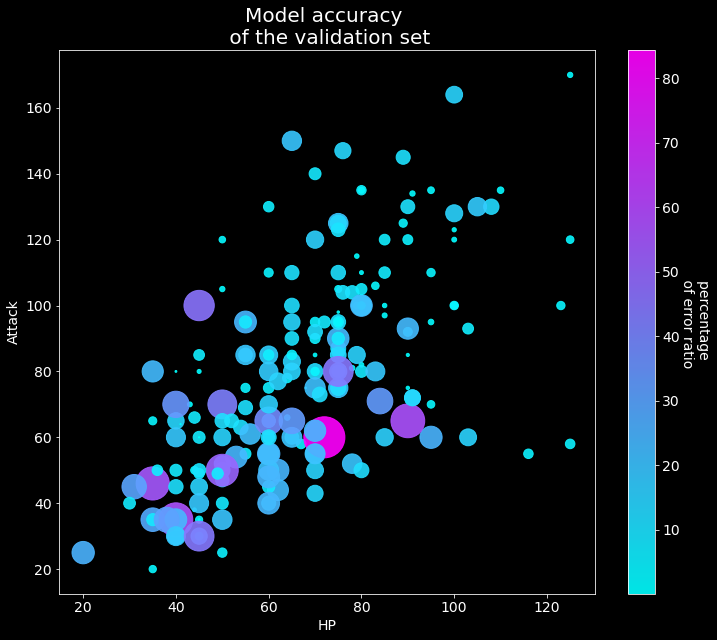

In [46]:
x = np.array(val_X.HP)
y = np.array(val_X.Attack)
colors = abs(preds-val_y)/val_y*100

plt.figure(figsize=(12,10))
plt.rc("axes",titlesize=20)
plt.rc("axes",labelsize=14)
plt.rc("xtick",labelsize=14)
plt.rc("ytick",labelsize=14)
plt.rc("legend",fontsize=15)
plt.xlabel("HP")
plt.ylabel("Attack")
plt.title("Model accuracy \n of the validation set")
#plt.legend(["Ordinary", "Legendary"],loc="center left")
plt.scatter(x, y,s=colors*20, c=colors,cmap='cool',alpha=0.9)
plt.colorbar().set_label('percentage \n of error ratio', rotation=270,labelpad=30)
plt.style.use('dark_background')

plt.show()